In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np

import sklearn
import sklearn.datasets as datasets
%matplotlib inline 
#bibliothèque intégrée au Notebook
import warnings
warnings.filterwarnings('ignore')

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('NumPy: {}'.format(np.__version__))

np.random.seed(42)


Python: 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
Scikit-learn: 1.2.2
NumPy: 1.24.2


# Introduction

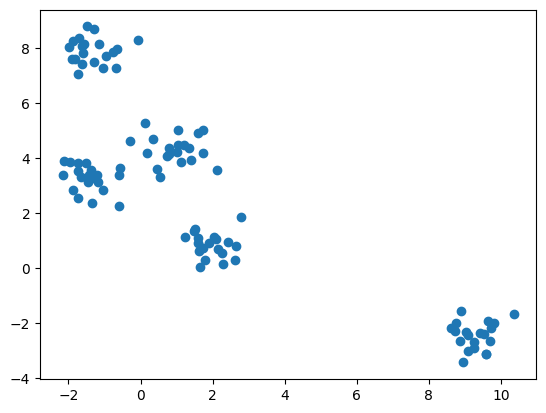

In [3]:
# Générer des données aléatoires 
X, Y = datasets.make_blobs(centers=5, cluster_std=0.5, random_state=0)

#Observer les données pour un aperçu sur ce qu'on va manipuler
plt.jet() 
plt.scatter(X[:,0], X[:,1])
plt.show()

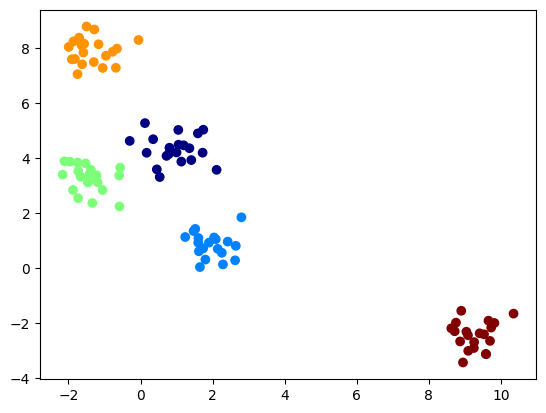

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

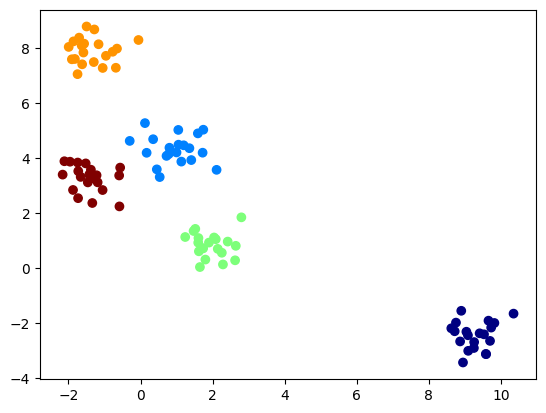

In [5]:
from sklearn.cluster import KMeans
# Tester k=4 puis k=5
kmeans = KMeans(5, random_state=0)

Y_hat = kmeans.fit(X).labels_
plt.scatter(X[:,0], X[:,1], c=Y_hat)
plt.show()

[[ 9.29876892 -2.45311503]
 [ 0.94994195  4.32130875]
 [ 1.95870099  0.8332413 ]
 [-1.34316029  7.9094545 ]
 [-1.43278801  3.27067413]]


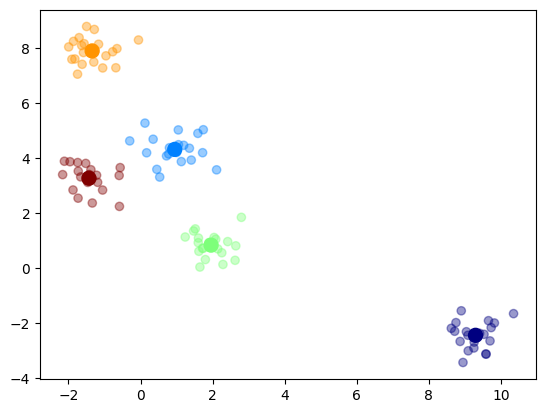

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
print(mu)

# Clustering MNIST avec K-Moyennes

## 1. Visualiser Base MNIST

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import scale

# Load 28*28 MNIST Images
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)

#Take only 10000 instances to shorten runtime of KMeans
X_digits = X_digits[0:10000]       
Y_digits = Y_digits[0:10000]
# Si normalisation : data = scale(X_digits.data) 
n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))
print ("n_digits: %d" % n_digits)
print ("n_features: %d" % n_features)
print ("n_samples: %d" % n_samples)



n_digits: 10
n_features: 784
n_samples: 10000


['5' '0' '4' ... '6' '9' '7']
n_samples per group: [1001 1127  991 1032  980  863 1014 1070  944  978]
4


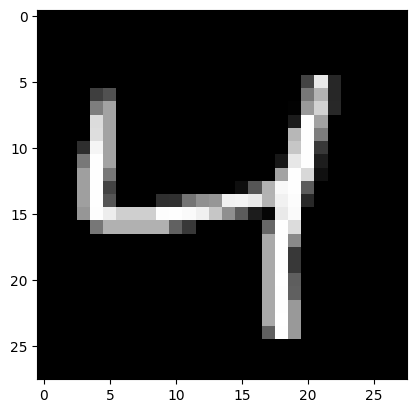

In [4]:
# Visualiser les labels
X_digits=np.array(X_digits)
Y_digits=np.array(Y_digits)
print(Y_digits)

Y_int=Y_digits.astype(int)
print("n_samples per group: %s" % np.bincount(Y_int))

# Visualiser un exemple d'image sample n°1 : X_digits[0]
plt.imshow(X_digits[2].reshape((28,28)), cmap='gray')
print(Y_digits[2])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']


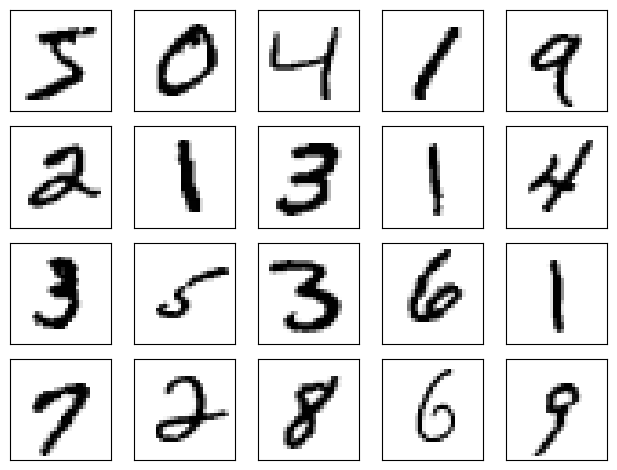

In [5]:
plt.rc("image", cmap="binary") # images en niveaux de gris
print(Y_digits[:20])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

## 2. Appliquer K-Moyennes

In [6]:
from sklearn.cluster import KMeans

n_clusters=5
kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
model=kmeans.fit(X_digits)

print("******** KMEANS completed ********")

centroid_digits = model.cluster_centers_

# Voir comment les échantillons sont classés
clusters=model.predict(X_digits) 


******** KMEANS completed ********


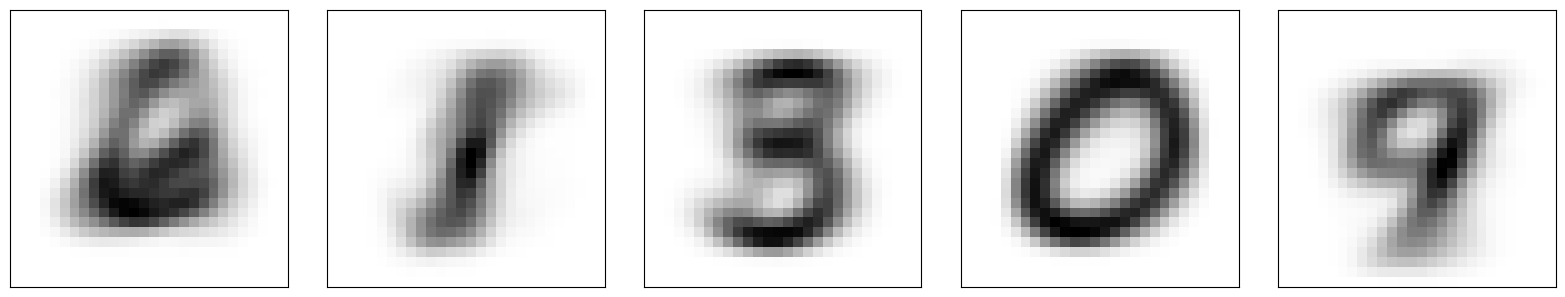

In [7]:
# Visualiser les centroids
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

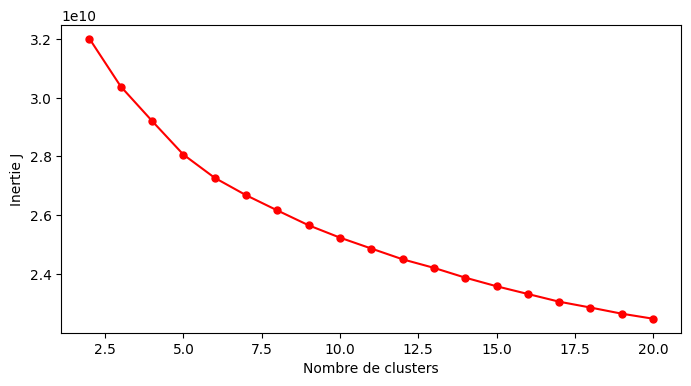

In [8]:
# Afficher la fonction de coût du modèle en fonction du nombre de clusters k
def plot_inertia(X_digits):
    inertia=[]  
    K_range=range(2,21)
    for k in K_range:
        model=KMeans(n_clusters = k).fit(X_digits)
        inertia.append(model.inertia_) #calculer le coût et le faire rentrer dans liste

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,inertia, marker='o', color='red', markersize=5)
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie J')
    plt.show()
    
plot_inertia(X_digits)    

## 3. Evaluer K

Pour n_clusters = 2 , Score silhouette moyen : 0.09079725914140457
Pour n_clusters = 3 , Score silhouette moyen : 0.05846608129542534
Pour n_clusters = 4 , Score silhouette moyen : 0.06319707733758367
Pour n_clusters = 5 , Score silhouette moyen : 0.07186471046399866
Pour n_clusters = 6 , Score silhouette moyen : 0.06941717833666441
Pour n_clusters = 7 , Score silhouette moyen : 0.07492341300013876
Pour n_clusters = 8 , Score silhouette moyen : 0.07806830793340544
Pour n_clusters = 9 , Score silhouette moyen : 0.06202560412834686
Pour n_clusters = 10 , Score silhouette moyen : 0.062185844240812096
Pour n_clusters = 11 , Score silhouette moyen : 0.06313313257558774
Pour n_clusters = 12 , Score silhouette moyen : 0.06272375459431034
Pour n_clusters = 13 , Score silhouette moyen : 0.06579715685467705
Pour n_clusters = 14 , Score silhouette moyen : 0.06743158444276995


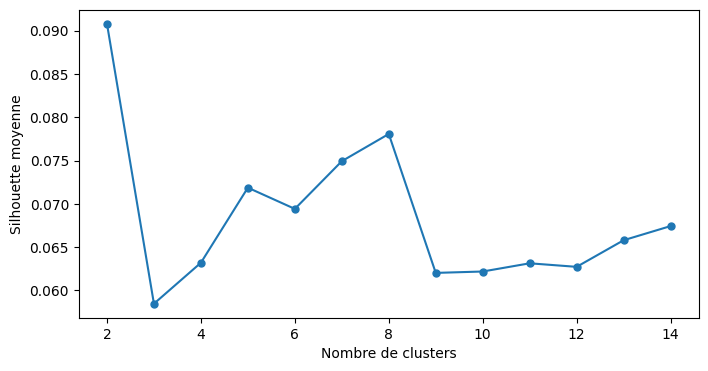

In [9]:
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
# Clustering metrics: silhouette

def plot_silhouette(X_digits):
    silhouette=[]
    K_range = range(2,15)
    for k in K_range:
        clusterer = KMeans(n_clusters = k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("Pour n_clusters =", k, ", Score silhouette moyen :", silhouette_avg)
        silhouette.append(silhouette_avg)
    
    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='o', markersize=5)
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Silhouette moyenne')
    plt.show()

plot_silhouette(X_digits)

## 4. Evaluer la qualité du clustering

In [11]:
#Répartition des images (lignes) sur les n_clusters (en colonne)
conf_matrix=sklearn.metrics.confusion_matrix(Y_int,clusters)
print(conf_matrix)

[[  64    9   75  842   11    0    0    0    0    0]
 [   1 1113    9    0    4    0    0    0    0    0]
 [ 659  198  102   10   22    0    0    0    0    0]
 [  18  118  844    9   43    0    0    0    0    0]
 [  53   98    0    0  829    0    0    0    0    0]
 [  26  308  400   14  115    0    0    0    0    0]
 [ 840  133   19   16    6    0    0    0    0    0]
 [   4  147    1    8  910    0    0    0    0    0]
 [  51  323  492    7   71    0    0    0    0    0]
 [  13  109   21    6  829    0    0    0    0    0]]


In [12]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

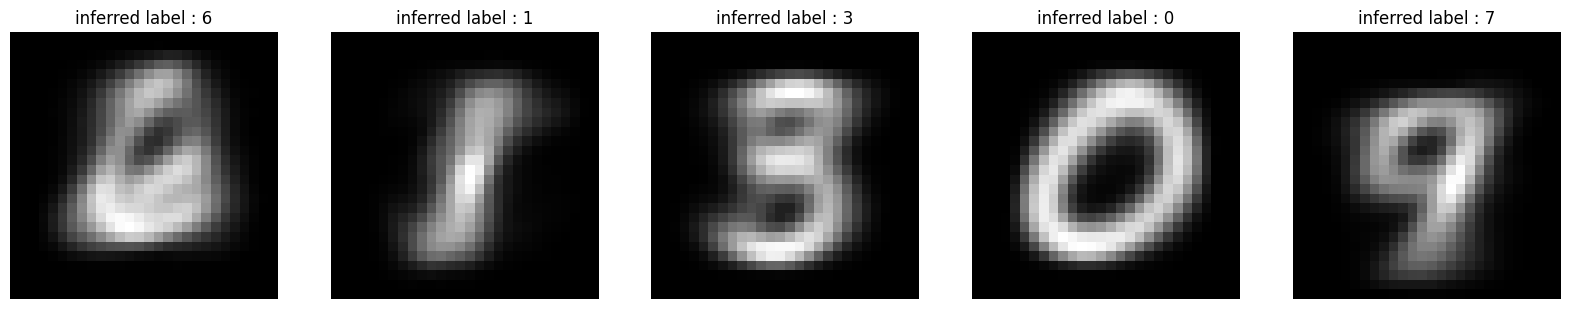

In [13]:
# Inférer un label à chaque cluster selon leurs contenu majoritaire

cluster_labels = infer_cluster_labels(model, Y_int)

ig, axs = plt.subplots(1,n_clusters,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))          
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
plt.show()


In [14]:
import scipy
# Evaluer la qualité des clusters par la mesure d'entropie
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Entropie moyenne=", entropie.mean())

Entropies= [7.45529849 7.84619882 7.58222919 6.81563999 7.95155933]
Entropie moyenne= 7.530185163337352


In [15]:
clu=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Tester differents nombres de clusters
for n_clusters in clu:
    estimator = KMeans(n_clusters = n_clusters, init="k-means++",n_init=4)
    estimator.fit(X_digits)
     
    # determiner les labels prédits
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculer et afficher le taux de bonnes répartitions
    acc=metrics.accuracy_score(Y_int, predicted_Y)
    acc=acc*100
    print('Bonne répartition : {}%\n'.format(acc))

Bonne répartition : 20.93%

Bonne répartition : 30.06%

Bonne répartition : 37.93%

Bonne répartition : 45.550000000000004%

Bonne répartition : 47.53%

Bonne répartition : 50.27%

Bonne répartition : 56.97%

Bonne répartition : 57.46%

Bonne répartition : 56.75%

Bonne répartition : 58.53%

Bonne répartition : 61.529999999999994%

Bonne répartition : 62.78%

Bonne répartition : 63.39%

Bonne répartition : 64.92%



In [ ]:
from sklearn_extra.cluster import KMedoids

n_clusters=5
kmedoids = KMedoids(n_clusters=n_clusters, init="k-medoids++")
model=kmedoids.fit(X_digits)

print("******** KMEDOIDS completed ********")

centroid_digits = model.cluster_centers_

# Voir comment les échantillons sont classés
clusters=model.predict(X_digits) 


In [ ]:
# Visualiser les centroids
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()